In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from functools import partial
import seaborn as sns; sns.set()

/home/dmitry/.pyenv/versions/3.8.2/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


# Реализация алгоритма k ближайших соседей

Возьмём синтетический пример классов из предыдущей главый чтобы реализовать классификатор методом ближайших соседей:

In [2]:
def kNN_classifier(x, X_train, Y_train, k=5):
    distances = np.sqrt((X_train[:, 0] - x[0]) ** 2 + (X_train[:, 1] - x[1]) ** 2)
    rank = np.argsort(distances)
    k_neighbours = Y_train[rank[:k]]
    
    estimates = {}
    for label in np.unique(k_neighbours):
        estimates[label] = np.sum(k_neighbours == label) / k
    
    estimates_rank = sorted(estimates, key=lambda label: estimates[label], reverse=True)
    
    return estimates_rank[0]
    

In [41]:
X_train, Y_train = make_blobs(n_samples=150, centers=2, random_state=0, cluster_std=0.9)


А теперь отобразим на плоскости границы классификации для каждого класса.

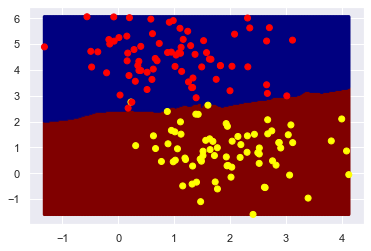

In [43]:
a, b = np.meshgrid(
    np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 200), 
    np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 200), 
                  )

X = np.array(list(zip(a.flatten(), b.flatten())))

f = partial(kNN_classifier, X_train=X_train, Y_train=Y_train, k=20)
predictions = np.array([f(x) for x in X]).astype(int)

plt.scatter(X[:, 0], X[:, 1], c=predictions, s=5, cmap='jet')
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap='autumn')
# plt.fill(X[:, 0], X[:, 1])